Sube el archivo train.csv


Saving train.csv to train (1).csv
Sube el archivo test.csv


Saving test.csv to test (2).csv
Vista de los datos de entrenamiento:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C1

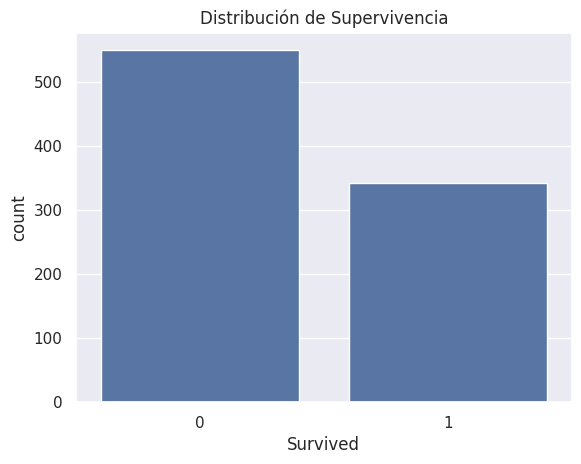

<ipython-input-3-4747fa9f4b69>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-3-4747fa9f4b69>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Distribución antes de balanceo:
Survived
0    444
1    268
Name: count, dtype: int64
Distribución después de balanceo:
Survived
0    444
1    444
Name: count, dtype: int64
Accuracy en validación: 0.8044692737430168
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       105
           1       0.74      0.81      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.80      0.81       179

Distribución de predicciones en validación:
0    98
1    81
Name: count, dtype: int64
Archivo submission.csv creado. Descárgalo para subirlo a Kaggle.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # Para balanceo de clases

# Configuración para gráficos
sns.set()

# Paso 2: Cargar los datos desde archivos subidos
from google.colab import files

print("Sube el archivo train.csv")
uploaded_train = files.upload()
print("Sube el archivo test.csv")
uploaded_test = files.upload()

# Cargar los datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Paso 3: Exploración de datos inicial
print("Vista de los datos de entrenamiento:")
print(train.head())
print(train.info())

# Distribución de la variable objetivo (Survived)
sns.countplot(data=train, x='Survived')
plt.title("Distribución de Supervivencia")
plt.show()

# Paso 4: Preprocesamiento de datos
# Rellenar valores faltantes
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Codificar variables categóricas
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Eliminar columnas irrelevantes
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Paso 5: Separar características y etiqueta
X = train.drop('Survived', axis=1)
y = train['Survived']

# Paso 6: Dividir datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 7: Balanceo de clases (opcional si las clases están desbalanceadas)
print("Distribución antes de balanceo:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Distribución después de balanceo:")
print(pd.Series(y_train_balanced).value_counts())

# Paso 8: Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Paso 9: Evaluar el modelo
y_pred = model.predict(X_val)
print("Accuracy en validación:", accuracy_score(y_val, y_pred))
print("Reporte de clasificación:\n", classification_report(y_val, y_pred))
print("Distribución de predicciones en validación:")
print(pd.Series(y_pred).value_counts())

# Paso 10: Predicciones en el conjunto de prueba
predictions = model.predict(test_data)

# Paso 11: Crear archivo de envío
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Archivo submission.csv creado. Descárgalo para subirlo a Kaggle.")

# Descargar el archivo de predicciones
from google.colab import files
files.download('submission.csv')
